<a href="https://colab.research.google.com/github/Sakhile-Ngcobo/Predicting-Customer-Churn/blob/main/Predicting_Customer_Churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/Lungisanikhan/Telco-Customer-Churn.git

fatal: destination path 'Telco-Customer-Churn' already exists and is not an empty directory.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv('/content/Telco-Customer-Churn/Telco-Customer-Churn - Cleaned.csv')

In [ ]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
#determining the size of the feaure space
print('This dataset consists of {} features.'.format(len(data.columns)))

This dataset consists of 21 features.


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.798992
std,0.368612,24.559481,30.090047,2266.730170
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [ ]:
#checking for missing values
data.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [ ]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

<Axes: xlabel='Churn', ylabel='count'>

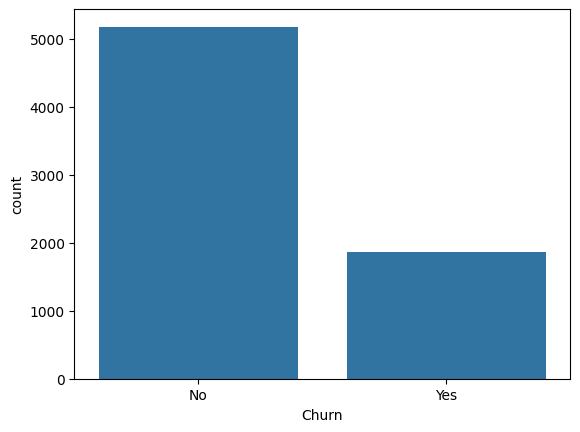

In [ ]:
sns.countplot(x='Churn', data=data)

In [ ]:
data['Churn'] =data['Churn'].map({'Yes':1, 'No':0})

In [ ]:
data['Churn'].value_counts()

,count
Churn,
0,5174
1,1869


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
y= data['Churn']
X = data.drop(['Churn', 'customerID'], axis=1)

In [ ]:
pre_X_train, pre_X_test, pre_y_train, pre_y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
y

,Churn
0,0
1,0
2,1
3,0
4,1
...,...
7038,0
7039,0
7040,0
7041,1


Building a preprocessing pipeline


In [ ]:
categorical_feat = data.drop(['customerID','Churn'], axis=1).select_dtypes(include='object').columns.tolist()
numeric_feat = data.drop(['customerID','Churn'], axis=1).select_dtypes(include='number').columns.tolist()

In [ ]:
categorical_feat

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod']

In [ ]:
data[['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']].head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,0,1,29.85,29.85
1,0,34,56.95,1889.50
2,0,2,53.85,108.15
3,0,45,42.30,1840.75
4,0,2,70.70,151.65


In [ ]:
data.head(1)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [ ]:
cat_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

num_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

preprocessor = ColumnTransformer([
    ('num', num_transformer, numeric_feat),
    ('cat', cat_transformer, categorical_feat)

])

In [ ]:
pre_pipe = Pipeline([
    ('preprocessor', preprocessor)
])

In [ ]:
pre_X_train.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
1695,Male,0,Yes,Yes,54,Yes,Yes,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Electronic check,70.70,3770.00
1095,Male,0,No,No,1,Yes,No,Fiber optic,No,No,No,No,Yes,No,Month-to-month,Yes,Electronic check,80.55,80.55
3889,Male,0,No,No,13,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Credit card (automatic),19.30,259.65
3667,Female,1,Yes,Yes,24,Yes,No,Fiber optic,No,No,Yes,No,Yes,Yes,Two year,Yes,Electronic check,96.55,2263.45
2902,Female,1,No,No,6,Yes,No,Fiber optic,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,74.10,450.90


In [ ]:
pre_pipe.fit(pre_X_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['SeniorCitizen', 'tenure',
                                                   'MonthlyCharges',
                                                   'TotalCharges']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['gender', 'Partner',
                                                   'Dependents', 'PhoneService',
                                                   'MultipleLines',
                                                   'InternetService',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'DeviceProtection',
                                                   'TechSupport', 'StreamingTV',
                                                   'StreamingMovies',
                                                   'Contract',
                                                   'PaperlessBilling',
                                                   'PaymentMethod'])]))])

In [ ]:
pre_X_train = pre_pipe.transform(pre_X_train)
pre_X_test = pre_pipe.transform(pre_X_test)

In [ ]:
pre_X_train = pd.DataFrame(pre_X_train,columns= pre_pipe.named_steps['preprocessor'].get_feature_names_out())
pre_X_test = pd.DataFrame(pre_X_test,columns= pre_pipe.named_steps['preprocessor'].get_feature_names_out())

In [ ]:
pre_X_train.head(1)

,num__SeniorCitizen,num__tenure,num__MonthlyCharges,num__TotalCharges,cat__gender_Female,cat__gender_Male,cat__Partner_No,cat__Partner_Yes,cat__Dependents_No,cat__Dependents_Yes,...,cat__StreamingMovies_Yes,cat__Contract_Month-to-month,cat__Contract_One year,cat__Contract_Two year,cat__PaperlessBilling_No,cat__PaperlessBilling_Yes,cat__PaymentMethod_Bank transfer (automatic),cat__PaymentMethod_Credit card (automatic),cat__PaymentMethod_Electronic check,cat__PaymentMethod_Mailed check
0,-0.436831,0.881078,0.195927,0.654495,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [ ]:
#sns.pairplot(pre_X_train)

<Axes: >

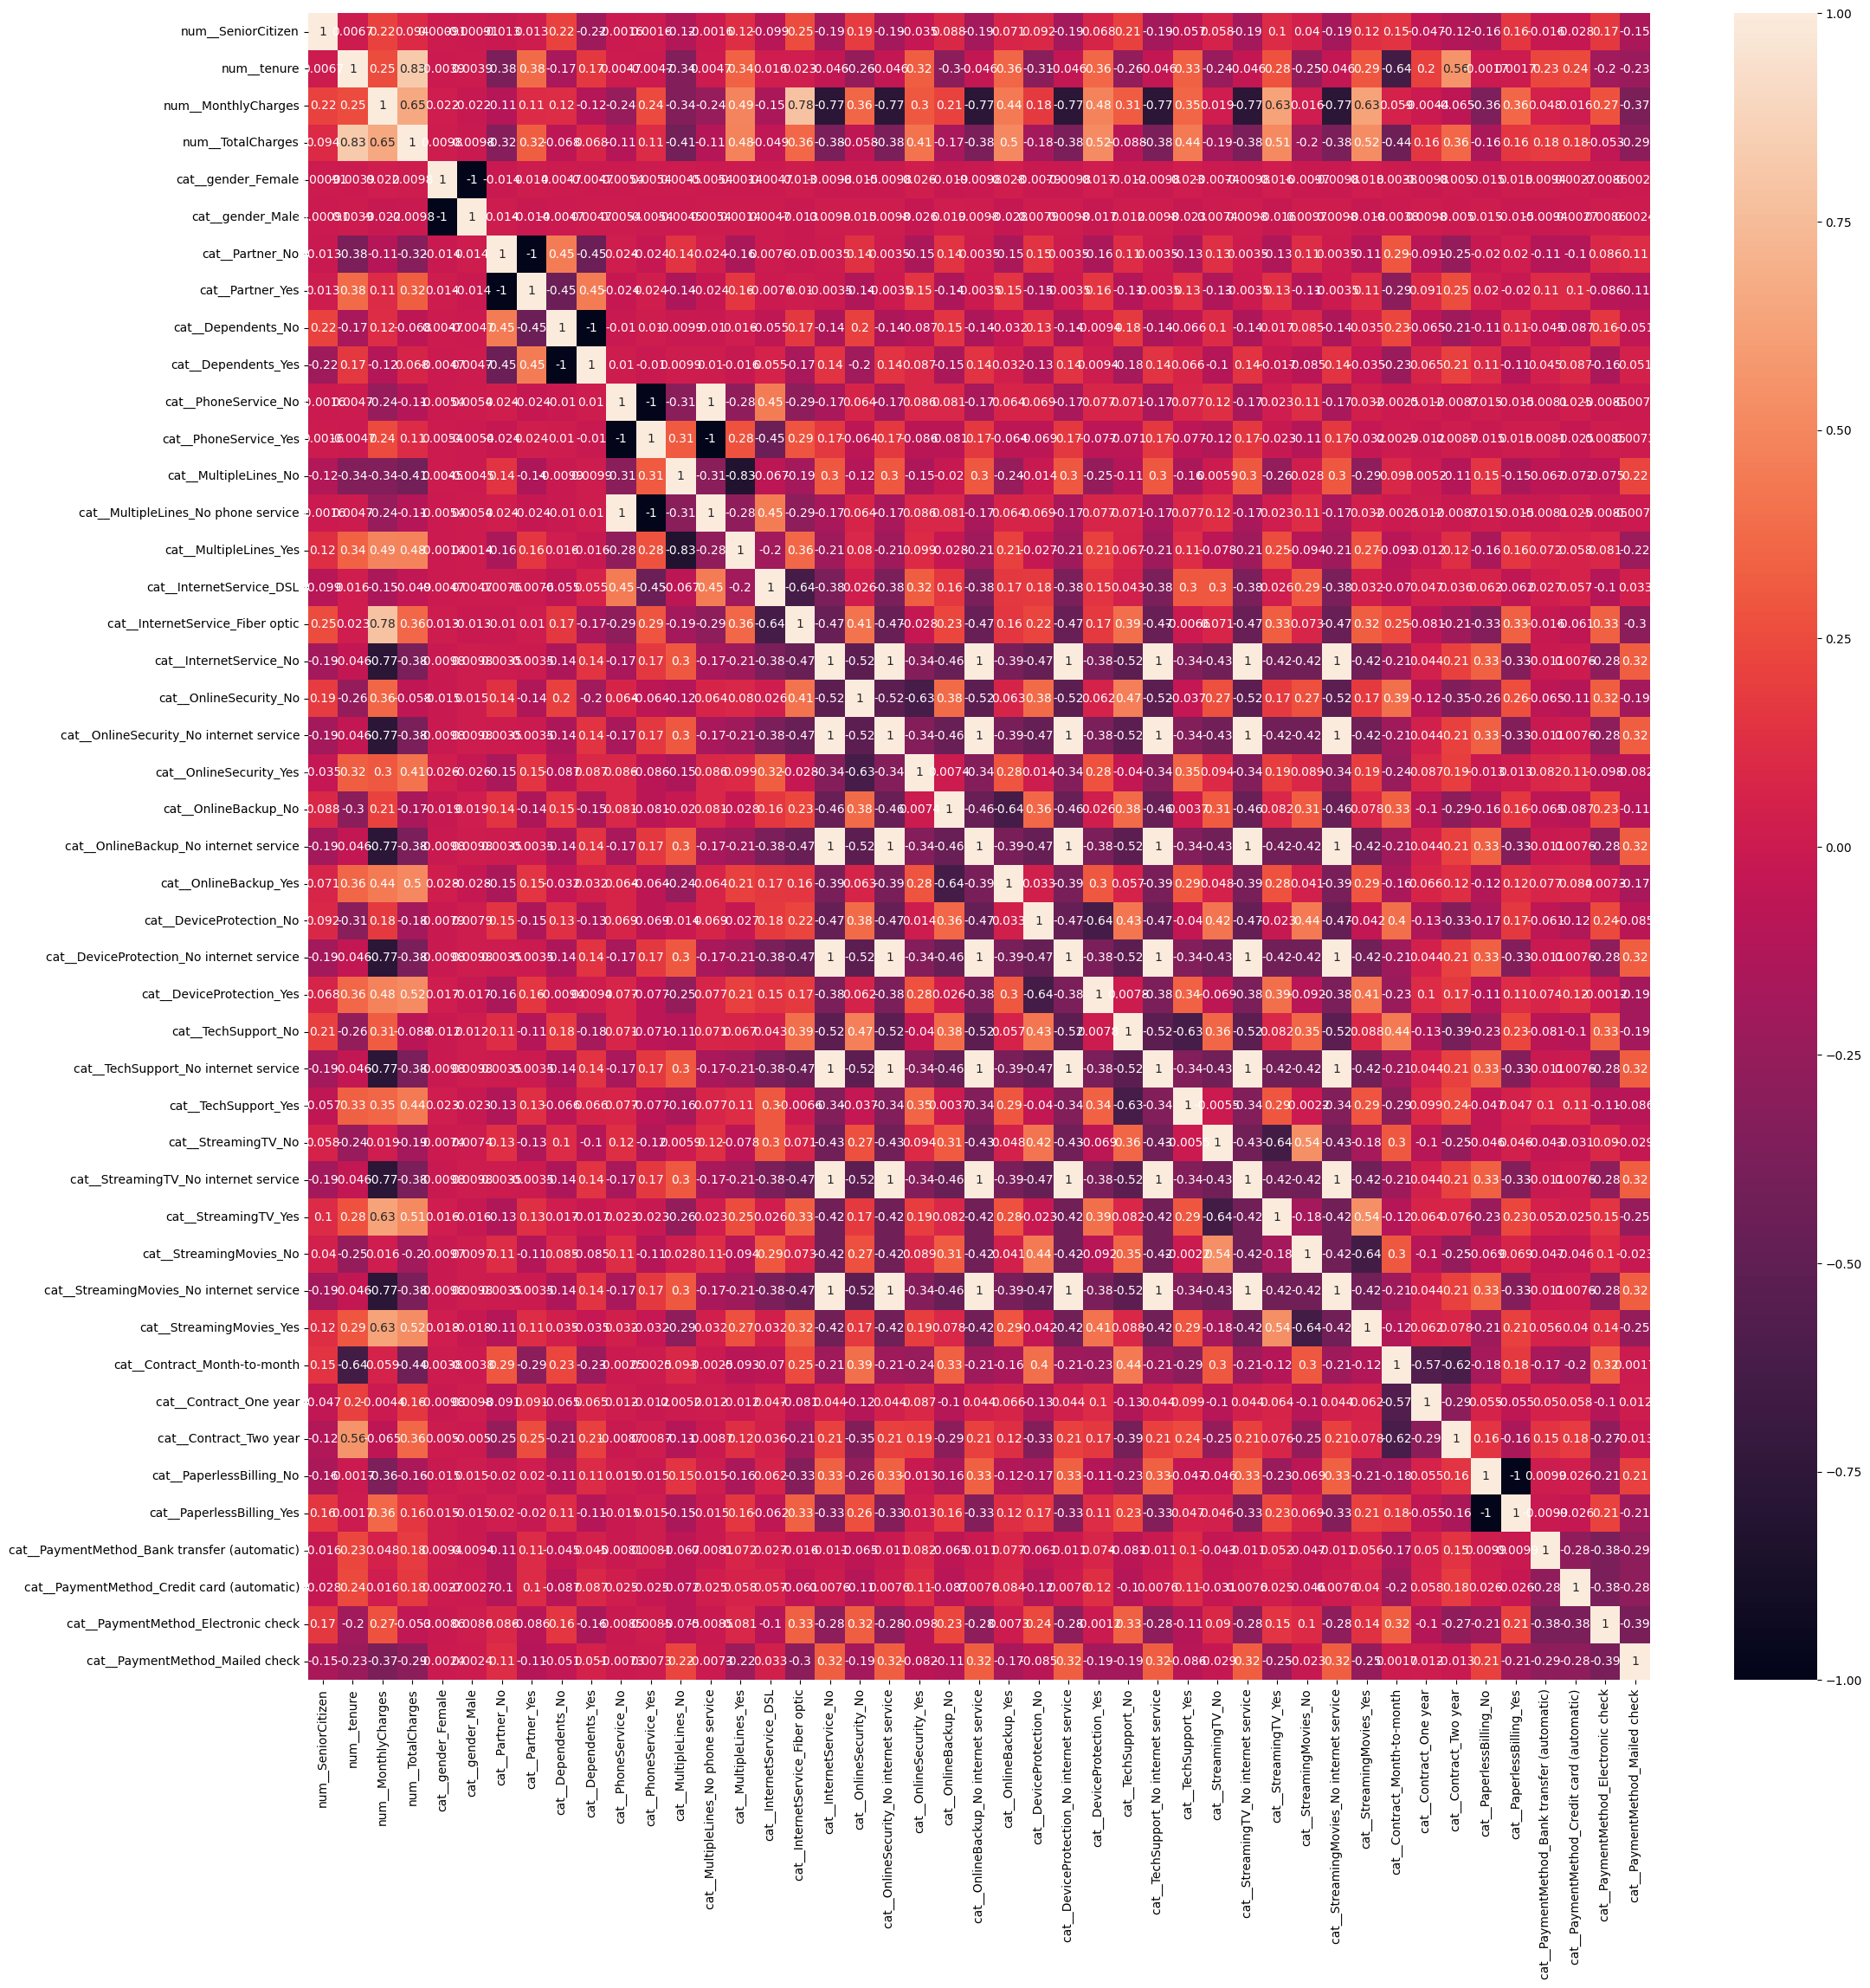

In [ ]:
plt.figure(figsize=(25,25))
corrmat = pre_X_train.corr()
sns.heatmap(corrmat, annot=True)

Ideallly the correlation heatmap should show a strong correlation with the target feature and the feature with itself(Among the diagonal). In the above there is strong correlation amongst features breaking the previously mentioned criterion

In [ ]:
%pip install feature-engine

In [ ]:
from feature_engine.selection import SmartCorrelatedSelection, DropConstantFeatures, DropDuplicateFeatures

In [ ]:
feat_pipe = Pipeline([
    ('constant', DropConstantFeatures(tol=0.998)),
    ('duplicate', DropDuplicateFeatures()),
    ('correlated', SmartCorrelatedSelection(threshold=0.8,selection_method='variance' ))
])

In [ ]:
feat_pipe.fit(pre_X_train)

Pipeline(steps=[('constant', DropConstantFeatures(tol=0.998)),
                ('duplicate', DropDuplicateFeatures()),
                ('correlated',
                 SmartCorrelatedSelection(selection_method='variance'))])

In [ ]:
pre_X_train = feat_pipe.transform(pre_X_train)
pre_X_test = feat_pipe.transform(pre_X_test)

<Axes: >

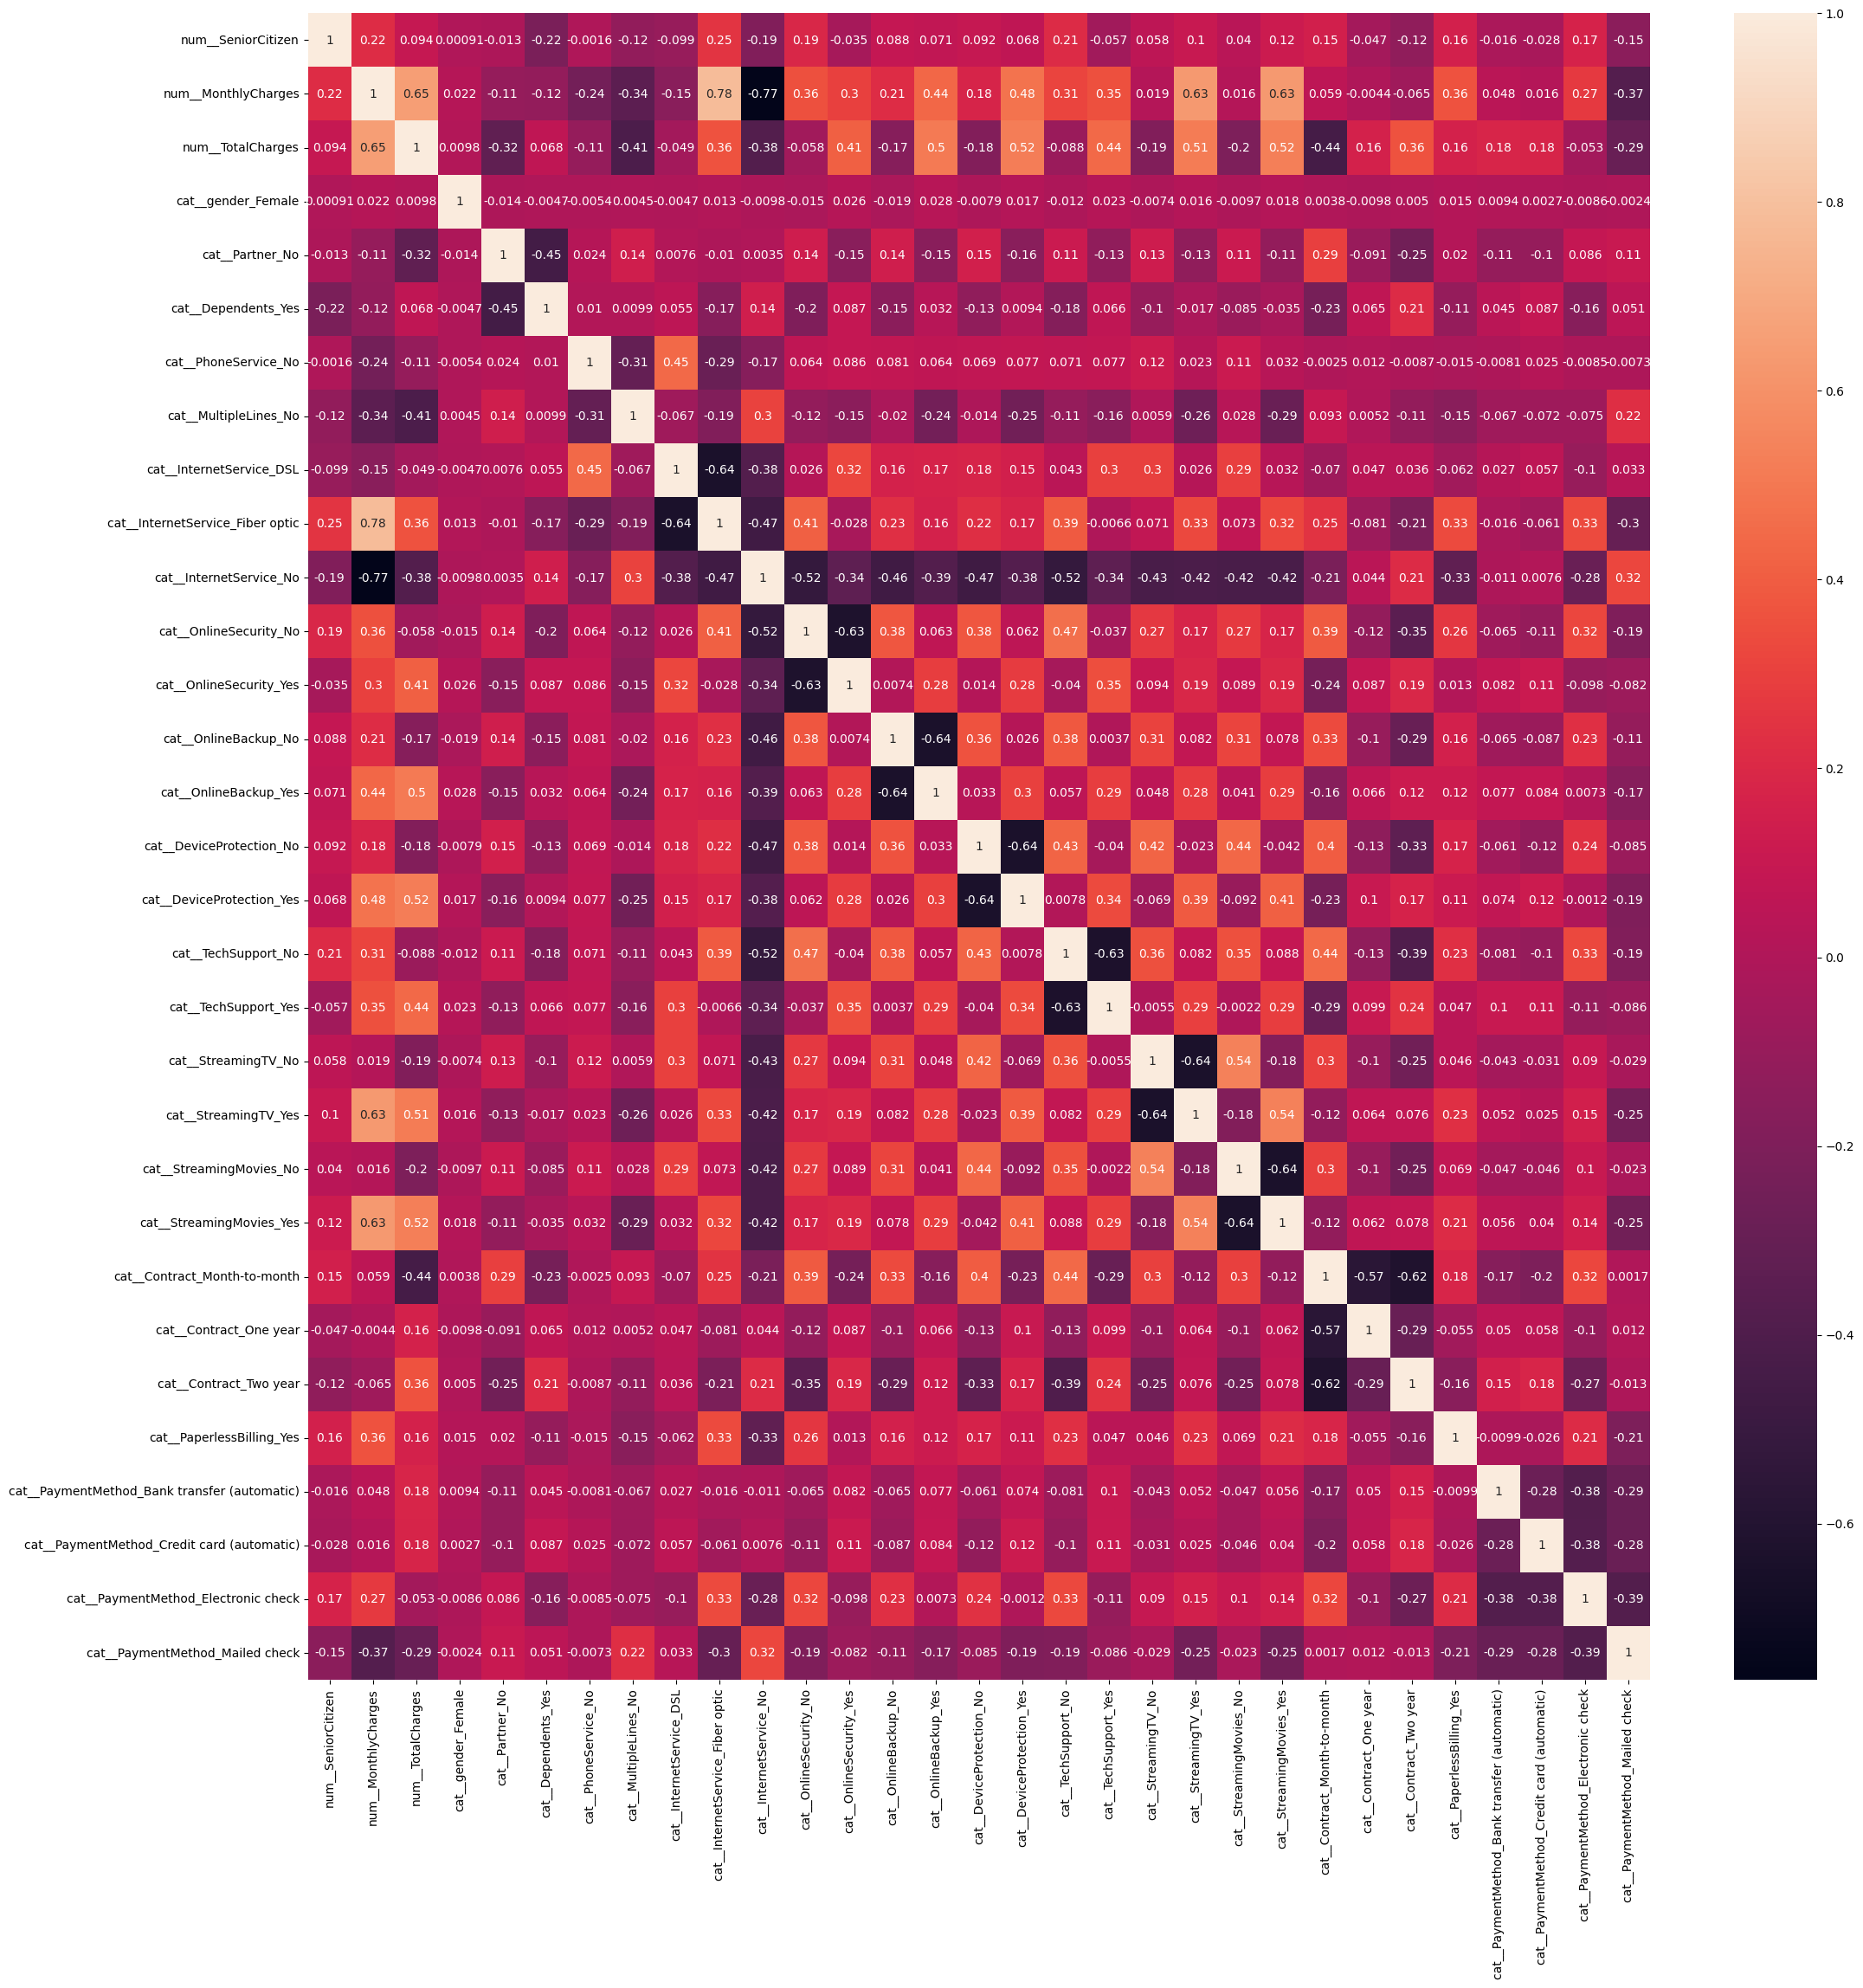

In [ ]:
plt.figure(figsize=(25,25))
sns.heatmap(pre_X_train.corr(), annot=True)

In [ ]:
#sns.pairplot(pre_X_train)

In [290]:
#Investigating the relationship of each feature to the
demo = pd.concat([pre_X_train,pre_y_train],axis=1)
demo.corr()['Churn']

,Churn
num__SeniorCitizen,0.014050
num__MonthlyCharges,-0.010761
num__TotalCharges,-0.005382
cat__gender_Female,0.001861
cat__Partner_No,0.021551
cat__Dependents_Yes,-0.008243
cat__PhoneService_No,-0.003147
cat__MultipleLines_No,0.004080
cat__InternetService_DSL,0.009127
cat__InternetService_Fiber optic,-0.012270


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
early_stop =EarlyStopping(monitor='val_loss', verbose=0, mode='min', patience=5)

In [ ]:
model = Sequential()
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(8, activation='relu'))

model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy')
model.fit(pre_X_train, pre_y_train, epochs=100,batch_size=128 ,validation_data=(pre_X_test, pre_y_test), callbacks=[early_stop])

Epoch 1/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.6395 - val_loss: 0.4788
Epoch 2/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5125 - val_loss: 0.4401
Epoch 3/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4788 - val_loss: 0.4307
Epoch 4/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4788 - val_loss: 0.4282
Epoch 5/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4565 - val_loss: 0.4264
Epoch 6/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4667 - val_loss: 0.4236
Epoch 7/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4615 - val_loss: 0.4198
Epoch 8/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4513 - val_loss: 0.4214
Epoch 9/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4529 - val_loss: 0.4201
Epoch 10/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.4415 - val_loss: 0.4234
Epoch 11/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4457 - val_loss: 0.4195
Epoch 12/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4

In [ ]:
model_history = pd.DataFrame(model.history.history)

In [ ]:
model_history.head(5)

,loss,val_loss
0,0.594265,0.478789
1,0.503758,0.440075
2,0.479284,0.430725
3,0.472188,0.428210
4,0.463809,0.426387


<Axes: >

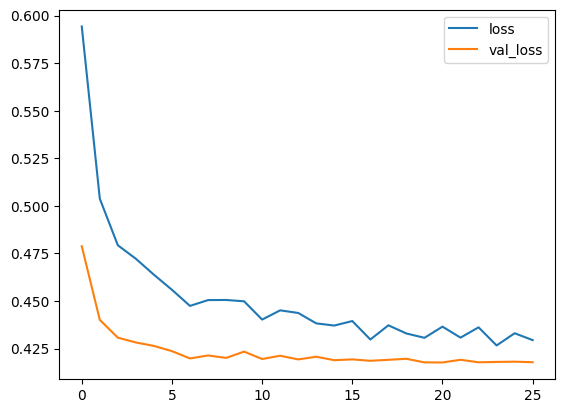

In [ ]:
model_history.plot()

In [ ]:
model.evaluate(pre_X_test, pre_y_test)

67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4114


0.4178292751312256

In [ ]:
y_pred =model.predict(pre_X_test)

67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


In [ ]:
y_pred = pd.DataFrame(y_pred, columns=['Predicted Y'])

In [ ]:
y_pred['Predicted Y'] = y_pred['Predicted Y'].apply(lambda x: 1 if x >=0.5 else 0)

In [ ]:
y_df = pd.concat([y_pred, pre_y_test], axis=1)

In [ ]:
pre_y_test.isna().sum()

0

In [ ]:
y_pred.isna().sum()

,0
Predicted Y,0


In [ ]:
y_df.columns=['Predicted Y', 'True Y']

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(pre_y_test, y_pred['Predicted Y']))
print('\n')
print(confusion_matrix(pre_y_test, y_pred['Predicted Y']))

              precision    recall  f1-score   support

           0       0.85      0.88      0.87      1539
           1       0.65      0.57      0.61       574

    accuracy                           0.80      2113
   macro avg       0.75      0.73      0.74      2113
weighted avg       0.79      0.80      0.80      2113



[[1362  177]
 [ 244  330]]


In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
reg_model = Pipeline(
    steps=[("preprocessor", preprocessor), ('constant', DropConstantFeatures(tol=0.998)),
    ('duplicate', DropDuplicateFeatures()),
    ('correlated', SmartCorrelatedSelection(threshold=0.8,selection_method='variance' )),
     ("classifier", LogisticRegression())]
)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

reg_model.fit(X_train, y_train)
print("model score: %.3f" % reg_model.score(X_test, y_test))

model score: 0.798


In [ ]:
reg_y =pd.DataFrame(reg_model.predict(X_test), columns=['Predicted Y'])

In [ ]:
print(classification_report(y_test, reg_y['Predicted Y']))
print('\n')
print(confusion_matrix(y_test, reg_y['Predicted Y']))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1041
           1       0.64      0.52      0.57       368

    accuracy                           0.80      1409
   macro avg       0.74      0.71      0.72      1409
weighted avg       0.79      0.80      0.79      1409



[[933 108]
 [177 191]]
